## Projet Python pour économiste 



La mobilité est au cœur des débats dans l’espace public et on ne compte plus les articles décriant l’installations des trottinettes électriques dans la capitale française. Cependant, si pour certains elles « envahissent les trottoirs », cet « envahissement » est pour les autres une preuve de leur accessibilité permettant le développant d’un nouveau mode de transport alternatif à ceux déjà existant. Ainsi, lors de la crise sanitaire celles-ci ont pu être une alternative possible aux transports en communs. 
La trottinette soulève donc des problématiques propres aux moyens de transports : répartition, localisation, flux, complémentarité, substitutions… 
C’est pourquoi, nous allons dans ce projet nous demander comment les trottinettes électriques sont présente dans cet espace public à Paris ? 


## I - Téléchargement des bases de données


Pour des raisons compréhensibles de concurrences la plupart des fournisseurs de trottinettes électriques ne laissent pas leurs bases de données accessibles facilement sur internet. Certaines entreprises revendent ces données mais heureusement nous avons pu télécharger des bases de données de l'application Tier grâce à une API. 


In [2]:
#Importations de tous les modules du code
import pandas as pd
import geopandas as gpd
import numpy as np
import requests
import tempfile
import zipfile
import json
import csv
import folium 
from shapely.geometry import Point, polygon
import matplotlib.pyplot as plt


In [ ]:
#Code permettant de télécharger les bases de données Tier 


r=requests.get("https://platform.tier-services.io/v2/vehicle?zoneId=PARIS",headers={"X-Api-Key": "bpEUTJEBTf74oGRWxaIcW7aeZMzDDODe1yBoSxi2"})
print(r.json()["data"][1])


df= pd.DataFrame(data=r.json()["data"])
BatteryLevel=[r.json()["data"][i]["attributes"]["batteryLevel"] for i in range(len(r.json()["data"]))]
Lat=[r.json()["data"][i]["attributes"]["lat"] for i in range(len(r.json()["data"]))]
Lng=[r.json()["data"][i]["attributes"]["lng"] for i in range(len(r.json()["data"]))]
Type=[r.json()["data"][i]["attributes"]["vehicleType"] for i in range(len(r.json()["data"]))]
Status=[r.json()["data"][i]["attributes"]["state"] for i in range(len(r.json()["data"]))]
ID=[r.json()["data"][i]["id"] for i in range(len(r.json()["data"]))]


df_Tier=pd.DataFrame(columns=["ID","BatteryLevel","Lat","Lng","Type","Status"])
df_Tier = df_Tier.fillna(0)
df_Tier["ID"]=ID
df_Tier["BatteryLevel"]=BatteryLevel
df_Tier["Lat"]=Lat
df_Tier["Lng"]=Lng
df_Tier["Type"]=Type
df_Tier["Status"]=Status
df_Tier["Heure"]="19h"
df_Tier["Jour"]="Lundi"



df_Tier.to_csv("/Users/dalilyoucefi/Desktop/TierBase9HSa.csv")

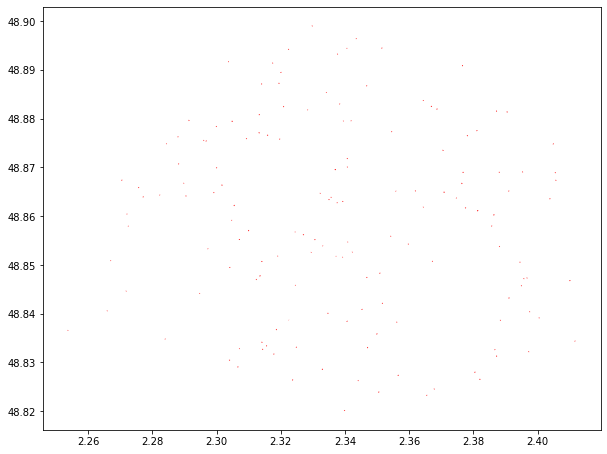

In [9]:
#Récupération des emplacements de trottinettes prévues par la ville de Paris
#fichier_emplacements = open("/Users/Leopold/Documents/DOCUMENTS/ENSAE/2A/Projet info/emplacements-de-stationnement-trottinettes.geojson")
fichier_emplacements = "emplacements-de-stationnement-trottinettes.geojson"
emplacements = gpd.read_file(fichier_emplacements)
emplacements.sample(150).plot(figsize=(10, 10), alpha=1, edgecolor='r', zorder = 2)

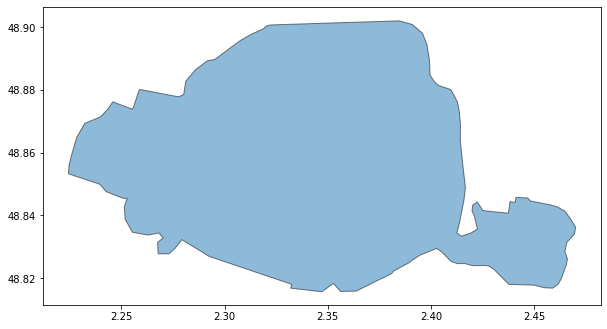

In [14]:
#Téléchargement de la carte de Paris



url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
        zip_ref.extractall(dirname + '/' + destname)
        
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes.head()

paris = communes[communes.insee.str.startswith("75")]
ax = paris.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax, crs = paris.crs.to_string())
ax

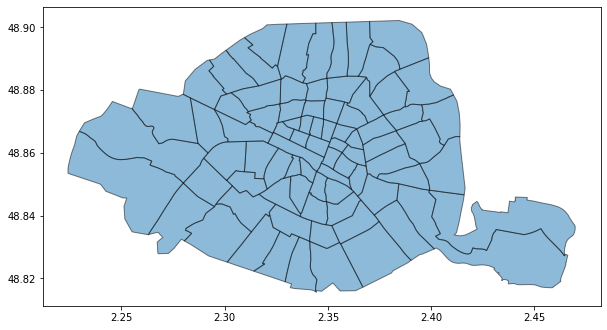

In [13]:
# Téléchargement de la carte des quartiers de Paris

quartiers = gpd.read_file("quartier_paris.geojson")
quartiers.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [18]:
#Base des stations de l'ile de France 
stations =  gpd.read_file("emplacement-des-gares-idf.geojson")

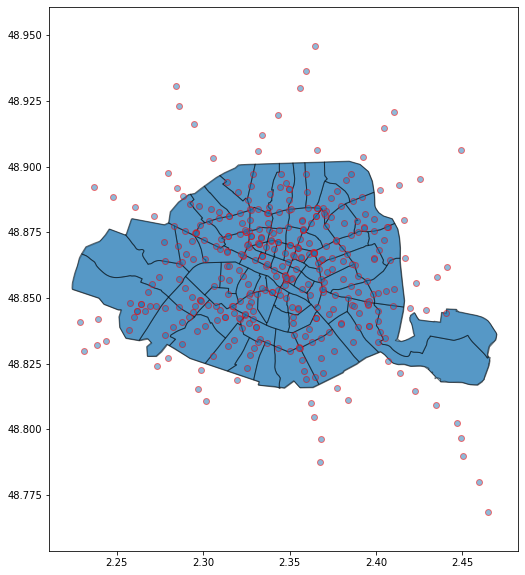

In [19]:
ax = stations[stations["mode"].str.startswith("Metro")].plot(figsize=(10, 10), alpha=0.5, edgecolor='r', zorder = 2)
paris.plot(ax = ax, figsize=(10, 10), alpha=0.5, edgecolor='k') 
quartiers.plot(ax = ax,figsize=(10, 10), alpha=0.5, edgecolor='k')

In [46]:
#Ajout des trottinettes 

df = pd.read_csv("TierBase9HLu.csv")


In [38]:
#Transformation des coordonées en un point de type geometry

df1 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lng'], df['Lat']))


## II – Une présence réglementée ? 



En théorie, il existe des zones réservées aux trottinettes qui sont délimitées et bien précises. Nous pouvons remarquer que les trottinettes n’y sont pas ! 
Nous avons donc d'abord téléchargé toutes les données géographiques nécessaires : arrondissements, quartiers, zones de dépôts réglementées


## III  La mise en place d’un nouveau mode de transport ou simplement d’une complémentarité avec les transports en commun déjà existant ? 


La mise en place des trottinettes éléctriques est présentée souvent comme un moyen de transport alternatif. Pour valider ou infirmer cette hypothèse nous avons eu pour idée de représenter les stations de métro et la localisation des trottinettes pour 

In [39]:
#Affichage de la carte sous module folium qui permet de naviguer lorsqu'on représente les trottinettes 

coords = (46.539758, 2.430331)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=6)
map

#Création de cerles aux emplacements géographiques des trotinettes  
for i in range(len(df)):
    folium.CircleMarker(
        location = (df1['Lat'][i], df1['Lng'][i]),
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    ).add_to(map)

sf = lambda x :{'fillColor':'#E88300', 'fillOpacity':0.5, 'color':'#E84000', 'weight':1, 'opacity':1}
folium.GeoJson(
    data=quartiers,
    name="idf",
    style_function= sf
).add_to(map)
map

sf2 = lambda x :{'fillColor':'#b', 'fillOpacity':0.5, 'color':'#b', 'weight':1, 'opacity':1}

#Création de flèches sur les stations de métro 
folium.GeoJson(
    data=stations[stations["mode"].str.startswith("Metro")]["geometry"], #sélection  des stations de métro
    name="stations",
    style_function= sf2
).add_to(map)
map



In [ ]:
#Création d'un fichier de la station la plus proche pour une trottinettes


df1["x"]=df1["geometry"].x
df1["y"]=df1["geometry"].y
stations["x"]=stations["geometry"].x
stations["y"]=stations["geometry"].y


#Etape où l'on crée une fonction pour passer dans la suite d'une distance en degré à une distance en mètre
def distance(x1,y1,x2,y2):
    R = 6373.0
    
    
    lat1 = math.radians(y1)

    lon1 = math.radians(x1)
    lat2 = math.radians(y2)
    lon2 = math.radians(x2)
    
    dlon = lon2 - lon1
    
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return (distance)

#Calcul de la proximité d'une station, ligne à la trottinette. 
min_distancei = float(1000000)
min_distance = []
station_min = []
ligne_min=[]
modemin=[]
for i in range(len(df1)):
    min_distancei = float(100000)
    station_min0 = "Essai"
    ligne_min0="Essai"
    mode_min0="Essai"
    for j in range(len(stations)):
        
        if distance(df1["x"][i],df1["y"][i],stations["x"][j],stations["y"][j]) <= min_distancei :
                min_distancei = distance(df1["x"][i],df1["y"][i],stations["x"][j],stations["y"][j])
                station_min0 = stations['nomlong'][j]
                ligne_min0=stations["ligne"][j]
                ligne_min0=stations["mode"][j]
           

    min_distance.append(min_distancei)
    station_min.append(station_min0)
    ligne_min.append(ligne_min0)
    modemin.append(mode_min0)
    #Ajout des résultats 
    df1["station_min"] = station_min
    df1["min_distance"] = min_distance
    df1["ligne_min"]= ligne_min
    df1["modemin"] = modemin
    #Création du fichier csv pour gagner du temps pour plus tard
    df1.to_csv('TierBase9HLu_modified.csv')


## IV - Statistiques descriptives : facteurs pouvant expliquer la concentration de trottinettes dans certains quartiers



In [ ]:
# importation des données
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import plotly.graph_objects as go
from scipy.stats import chi2_contingency as chi2_contingency
from scipy.stats import pearsonr
import geopandas as gpd

### Présentation de la base



In [ ]:
#chargement de la base
df = pd.read_csv('/Users/dalilyoucefi/Downloads/Base5Quartier.csv')
gdf = gpd.read_file('/Users/dalilyoucefi/Desktop/GeoTierLunsSA.geojson')
df.drop('numquartier',1,inplace=True)
df.drop('id_quartier',1,inplace=True)
df.drop('id_quartie',1,inplace=True)
df.drop('field_1',1,inplace=True)
df.drop('id_quartie_x',1,inplace=True)
df.drop('id_quartie_y',1,inplace=True)


Dictionnaire des variables :
- *c_qu*= numéro du quartier administratif
- *l_qu*= nom du quartier administratif
- *c_ar* = numéro de l'arrondissement
- *l_ar* = nom de l'arrondissement
- *prop_30-44* = proportion de la population de 30-44 ans dans l'arrondissement
- *prop_45-59* = proportion de la population de 45-59 ans dans l'arrondissement
- *prop_60-74* = proportion de la population de 60-74 ans dans l'arrondissement
- *prop_75+* = proportion de la population de plus de 75 ans dans l'arrondissement
- *nombre-15-* = nombre d'individus ayant entre 15 et 29 ans dans l'arrondissement
- *nombre-30-* = nombre d'individus ayant entre 30 et 44 ans dans l'arrondissement
- *nombre-45-* = nombre d'individus ayant entre 45 et 59 ans dans l'arrondissement
- *nombre-60-* = nombre d'individus ayant entre 60 et 74 ans dans l'arrondissement
- *nombre-75+* = nombre d'individus ayant plus de 75 ans dans l'arrondissement
- *pop* = nombre total d'individus dans l'arrondissement
- *densite* = densité de population au km²
- *nombretran* = nombre de station de métro/RER/tramway dans le quartier administratif
- *ref* = moyenne des loyers de référence du quartier administratif
- *nb_logmt_total* = nombre de logements sociaux financés par la ville de Paris dans le quartier administratif
- *nombre_de_commerce* = nombre de commerce dans le quartier administratif
- *nombreent*= nombre d'entreprises dans le quartier administratif
- *CA1* = moyenne des chiffres d'affaire des entreprises implantées dans le quartier administratif
- *nombrtrot9h* = nombre de trottinette dans le quartier administratif à 9h 
- *nombrtrot14h* = nombre de trottinette dans le quartier administratif à 14h
- *nombrtrot19h* = nombre de trottinette dans le quartier administratif à 19h
- *nombretrottotal* = nombre total de trotinette dans le quartier administratif

### Quelques représentations

In [ ]:
gdf_trott=gdf[['Heure','id_quartier']]
import plotly.express as px
fig1 = px.histogram(gdf_trott, x="id_quartier", color="Heure")
fig1.update_layout(
    title="Répartition des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig1.show()

In [ ]:
fig2 = px.histogram(gdf_trott, x="id_quartier", color="Heure", barnorm="percent",nbins=200)
fig2.update_layout(
    title="Proportion des trottinettes selon l'heure par quartier administratif",
    xaxis_title = "Quartier administratif",
    yaxis_title = "nombre",
    font = dict(
    family = "Courrier New, monospace",
    size=12,
    color = "Black"
    )
)
fig2.show()

On remarque que le nombre de trotinette par quartier administratif garde la même tendance selon les heures différentes de la journée. Ainsi, on peut uniquement considérer la variable *nombretrottotale*

### Test de chi-2

##### Premier test

Comme évoqué dans l'étude du 6-T Bureau de recherche, il est indiqué que les utilisateurs venaient de milieu aisé. 
Ainsi nous allons faire un premier test vérifiant l'indépendance entre les variables *ref* et *nombrtrot* et une deuxième test entre les variables *nb_logmt_total* et *nombrtrot*. On va supposer que l'hypothèse nulle est : "il y a indépendance entre les variables" contre l'hypothèse alternative : "il y a dépendance entre les variables". On va donc effectuer un test de chi-2 à 79 DDL

In [ ]:
# Test de chi-2 d'indépendance entre les variables ref et nombrtrot

# Création du tableau de contingence
cont = df[["ref", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

In [ ]:
# Test de chi-2 d'indépendance entre les variables nb_logmt_total et nombrtrot

# Création du tableau de contingence
cont = df[["nb_logmt_total", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

On observe que pour les 2 tests les p-values sont quasiment voire nulles. Ainsi on peut rejeter l'hypothèse de dépendance entre les variables *nb_logmt_total* et *nombrtrot* et *ref* et *nombrtrot* au seuil de 0.1%

In [ ]:
# Calcule du coefficient de Pearson entre les variables nb_logmt_total et ref
coeff_pearson,_ = pearsonr(df['nb_logmt_total'],df['ref'])
print("coefficient de Pearson = {}".format(coeff_pearson))

On observe que les variables sont très corrélées. Ainsi exécuter une régression linéaire de la variable indépendante nombrtrot sur les variables dépendantes ref et nb_logmt_total pourrait créer un biais de variable incluse. Ainsi si le biais a lieu, on sélectionnera la variable nb_logmt_total car la p-value sur le test de chi-2 d'indépendance est la plus faible.

##### Deuxième test
Par ailleurs selon l'étude évoquée précédemment, les motifs principaux de l'utilisation des trottinettes électriques sont le déplacement pour se rendre au travail et pour se "promener".
Ainsi, on va de nouveau exécuter deux test de chi-2 d'indépendance entre les variables *nombreent* et *nombrtrot* et *nombre_de_commerce* et *nombrtrot* avec les mêmes hypothèses que précédemment.

In [ ]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df[["nombre_de_commerce", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

In [ ]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df[["nombreent", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

On observe dans les 2 tests une *p-value* proche de zéro voire nulle, ainsi on peut rejeter au seuil de 0.1% que l'hypothèse nulle.

In [ ]:
# Calcule du coefficient de Pearson entre les variables nb_logmt_total et ref
coeff_pearson,_ = pearsonr(df['nombreent'],df['nombre_de_commerce'])
print("coefficient de Pearson = {}".format(coeff_pearson))

On a un coefficient de Pearson de ..., ce qui est peu élevé. Ainsi, exécuter une régression linéaire de la variable dépendante *nombrtrot* sur les variables indépendants *nombreent* et *nombre_de_commerce* est susceptible de ne pas créer un bais. On va donc garder ces deux variables dans notre jeu de données.

##### Troisième test

Mais encore, la trottinette un mode de transport à l'intermodalité. Ainsi on peut s'intéresser s'il y a indépendance entre le nombre de trottinette dans un quartier administratif et le nombre de stations de transport dans ce même lieu. 
De nouveau on va effectuer un test de chi-2 entre les variables *nombretran* et *nombrtrot*.

In [ ]:
# Test de chi-2 d'indépendance entre les variables nombreent et ref

# Création du tableau de contingence
cont = df[["nombretran", "nombretrottotal"]]

#Calcul avec scipy
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2,degrees,pvalue

De nouveau on trouve une *p-value* très faible. Ainsi, on peut rejeter au seuil de 0.1% l'hypothèse nulle. Il y a donc dépendance entre les deux variables. 

In [ ]:
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Circle
from sklearn.decomposition import PCA
import numpy as np
from scipy import cluster
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.stats import chi2_contingency, pearsonr



In [ ]:
def circleOfCorrelations(pc_infos, ebouli):
    
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

In [ ]:
def myPCA(df, clusters=None):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA(n_components='mle')
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
	plt.show()
	
	
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	
	plt.show()
	# Plot PCA
	dat = pd.DataFrame(pca_res, columns=cols)
	if isinstance(clusters, np.ndarray):
		for clust in set(clusters):
			colors = list("bgrcmyk")
			plt.scatter(dat["PC-0"][clusters==clust],dat["PC-1"][clusters==clust],c=colors[clust])
	else:
		plt.scatter(dat["PC-0"],dat["PC-1"])
	plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.title("PCA")
	plt.show()
	return pc_infos, ebouli

In [ ]:
df.columns

In [ ]:
df2=df[[ 'nombre_0-1',
       'nombre_15-', 'nombre_30-', 'nombre_45-', 'nombre_60-', 'nombre_75+',
       'pop', 'densite', 'nombretran', 'ref', 'nb_logmt_total',
       'nombre_de_commerce', 'nombreent', 'CA 1', 'nombretrot9h',
       'nombretrot14h', 'nombretrot19h', 'nombretrottotal']]

In [ ]:
pc_infos,ebouli=myPCA(df2)

In [ ]:
plt.figure(figsize=(25,25))
circleOfCorrelations(pc_infos, ebouli)
plt.show()